## <center > Brazilian E-Commerce Data Analysis</center>

   <b>Presented by:</b>
        
   Soasingarayar Abonia
        
   M2-Artificial Intelligence-IA school
   
   Aissatou BA
   
   M1-Artificial Intelligence-IA school
        
   <b>Guided by:</b>
       
   Manel Boumaiza Prof. AI-IA School

## 1. Introduction

In this kernel, I would like to show some descriptive analysis of 'Olist Store' from Brazil. This data contains 100k orders information.

Above analysis made by orders, geolocation, payments, seller, and products datasets. The aim of this project is finding the Top 10 products and sellers, analysis of orders by their geolocation and obtain information about Brazilian's online e-commerce profiles. 

### Data Schema
<img src="img/Data Schema.jpg">

### Database  Schema
<img src="img/Schema.jpg">

### Database ER Diagram
<img src="img/EER Diagram.jpg">

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
import pymysql.cursors

# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='',
                             db='brazilian e-commerce',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

## 2. Geo Exploratory

In [3]:
geo_data = pd.read_sql_query(
    "select * from olist_geolocation_dataset;",
    connection)

In [4]:
geo_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'Library'), 'share')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap

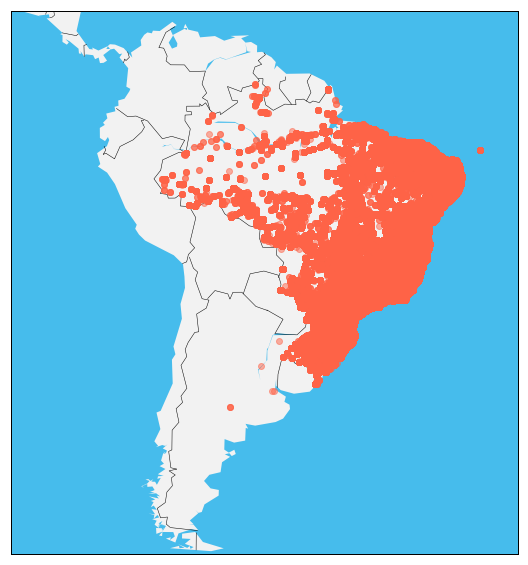

In [6]:
from mpl_toolkits.basemap import Basemap
lat = geo_data['geolocation_lat']
lon = geo_data['geolocation_lng']

plt.figure(figsize=(10,10))

m = Basemap(llcrnrlat=-55.401805,llcrnrlon=-92.269176,urcrnrlat=13.884615,urcrnrlon=-27.581676)
m.bluemarble()
m.drawmapboundary(fill_color='#46bcec') # Make your map into any style you like
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec') # Make your map into any style you like
#m.drawcoastlines()
m.drawcountries()
m.scatter(lon, lat,zorder=10,alpha=0.5,color='tomato')

When we examine the population of Brazil, most of the population lived on the east coast and the small part is living more west side. Above map shows the location of purchased product orders and according to the distribution of populations, it explains the highest shopping rate on the east coast. 

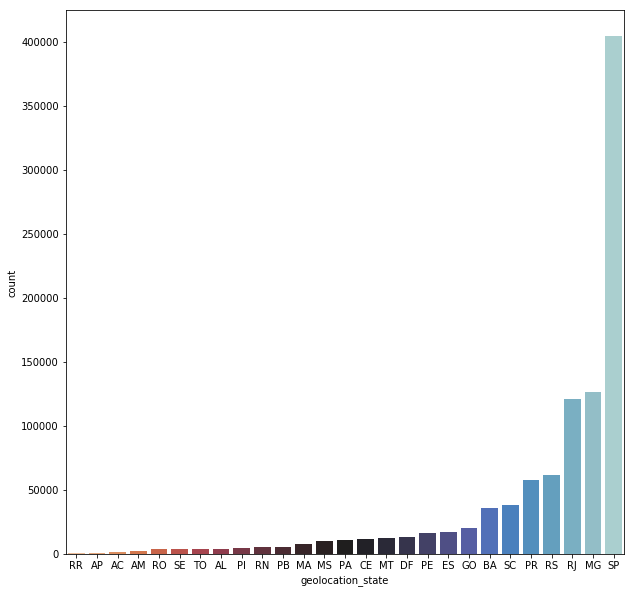

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(x ='geolocation_state', data=geo_data, 
              order=geo_data['geolocation_state'].value_counts().sort_values().index, 
              palette='icefire_r')

The above graph shows the number of product orders purchased based on the states. According to that, São Paulo has the highest rate and there is a huge gap between the rest of the states.

## 3. Data Exploratory

### 3.1. Order Data

In [9]:
order_data = pd.read_sql_query(
    "select * from olist_orders_dataset;",
    connection)
order_data.tail(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99431,b0f4af5c1b06e24fef510703bfe9f0a6,8e1ec396e317ff4c82a03ce16a0c3eb3,delivered,2017-10-27 15:21:00,2017-10-27 15:32:49,2017-10-30 15:44:34,2017-11-10 17:57:22,2017-11-22 00:00:00
99432,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00
99433,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00
99434,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [10]:
order_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### 3.1.1. Feature Enginering with Time

Since, missing values' proportion is around 3%, Null Values from ``customer date`` feature will be filled with forward-fill method. This method, propagate the previous value forward

In [11]:
order_data['order_delivered_customer_date']= order_data['order_delivered_customer_date'].fillna(method='ffill')
order_data['order_delivered_customer_date'].isnull().sum()

0

``Delivered time`` and ``Estimate time`` features will be created.

In [12]:
order_data['delivered_time']=pd.to_datetime(order_data['order_delivered_customer_date'],
                                            format='%Y-%m-%d').dt.date
order_data['estimate_time']=pd.to_datetime(order_data['order_estimated_delivery_date'], 
                                           format='%Y-%m-%d').dt.date

``Weekly`` feature created based on ``order delivered customer date``

In [13]:
order_data['weekly']=pd.to_datetime(order_data['order_delivered_customer_date'],
                                    format='%Y-%m-%d').dt.week

``Yearly`` feature created based on ``order delivered customer date``

In [14]:
order_data['yearly']=pd.to_datetime(order_data['order_delivered_customer_date'])\
                    .dt.to_period('M')
order_data['yearly']= order_data['yearly'].astype(str)

Finding different days of delivered and estimated times.

In [15]:
order_data['diff_days']= order_data['delivered_time']-order_data['estimate_time']
order_data['diff_days']= order_data['diff_days'].dt.days

In [16]:
order_data.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_time,estimate_time,weekly,yearly,diff_days
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,2017-03-17,2017-03-28,11,2017-03,-11
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,2018-02-28,2018-03-02,9,2018-02,-2
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,2017-09-21,2017-09-27,38,2017-09,-6
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2018-01-25,2018-02-15,4,2018-01,-21
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,2018-03-16,2018-04-03,11,2018-03,-18


In [17]:
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_time,estimate_time,weekly,yearly,diff_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-10,2017-10-18,41,2017-10,-8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-08-07,2018-08-13,32,2018-08,-6
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-17,2018-09-04,33,2018-08,-18
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-12-02,2017-12-15,48,2017-12,-13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-16,2018-02-26,7,2018-02,-10


Text(0.5,1,'Average Difference Days per Week')

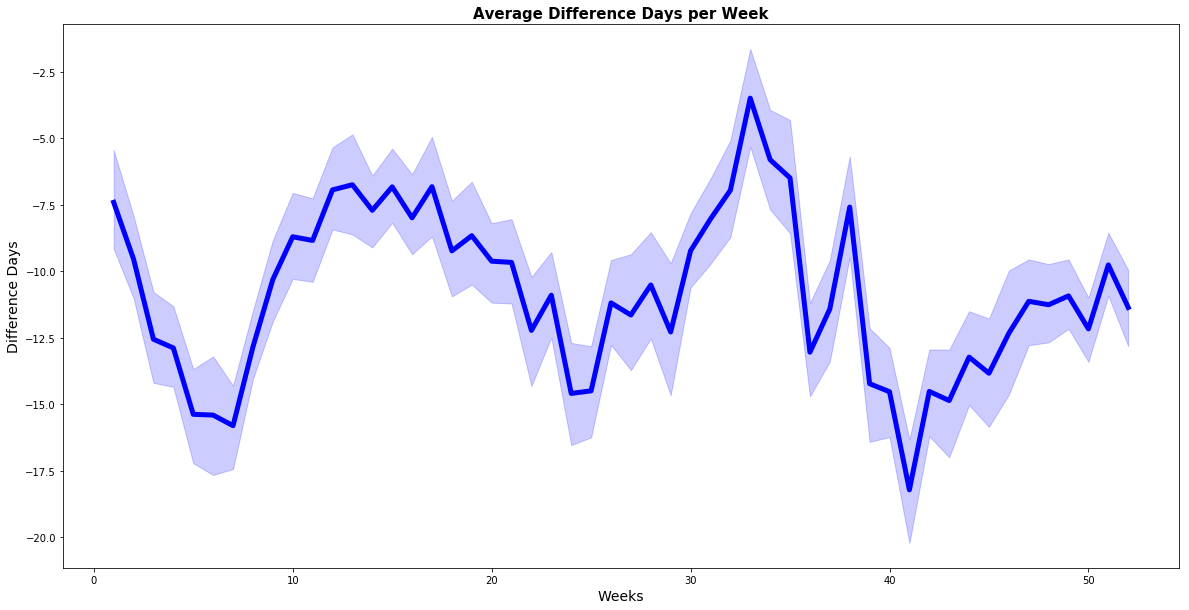

In [18]:
plt.figure(figsize=(20,10))
sns.lineplot(x='weekly', y='diff_days', data=order_data, color="blue", linewidth=5,
            markers=True,dashes=False, estimator='mean')

plt.xlabel("Weeks", size=14)
plt.ylabel("Difference Days", size=14)
plt.title("Average Difference Days per Week",size=15, weight='bold')

Above graph shows that the earliest and latest deliveries. According to that, we can say that all deliveries made before their estimated date. 
* The earliest deliveries have been made in October. It means that this month is the least intensive period in those years.
* Latest deliveries have been made at the end of June and beginning of August. It means that this time is the most intensive period in those years.

## 3.2. Customer Top 20 Product

First, Olist_orders and olist_order_items databases will be joined.

In [19]:
# Upload Olist_Order_Items and Product Data

order_item_data = pd.read_sql_query(
    "select * from olist_order_items_dataset;",
    connection)

products_data = pd.read_sql_query(
    "select * from olist_products_dataset;",
    connection)

In [20]:
order_item_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [21]:
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


In [22]:
#Merge data
total_orders=pd.merge(order_data, order_item_data)
product_orders=pd.merge(total_orders,products_data, on="product_id")
product_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111046 entries, 0 to 111045
Data columns (total 27 columns):
order_id                         111046 non-null object
customer_id                      111046 non-null object
order_status                     111046 non-null object
order_purchase_timestamp         111046 non-null object
order_approved_at                111032 non-null object
order_delivered_carrier_date     109889 non-null object
order_delivered_customer_date    111046 non-null object
order_estimated_delivery_date    111046 non-null object
delivered_time                   111046 non-null object
estimate_time                    111046 non-null object
weekly                           111046 non-null int64
yearly                           111046 non-null object
diff_days                        111046 non-null int64
order_item_id                    111046 non-null int64
product_id                       111046 non-null object
seller_id                        111046 non-null obj

Since the ``product_id`` value name is long, it needed to be shortened to make an analysis. With taking the last eight characters, uniqueness preserved. 

In [23]:
len(product_orders['product_id'].unique())

32340

In [24]:
len(product_orders['product_id'].str[-8:].unique())

32340

In [25]:
product_orders['product_id_shorten']=product_orders['product_id'].str[-8:]

Text(0.5,1,'Top 20 Products')

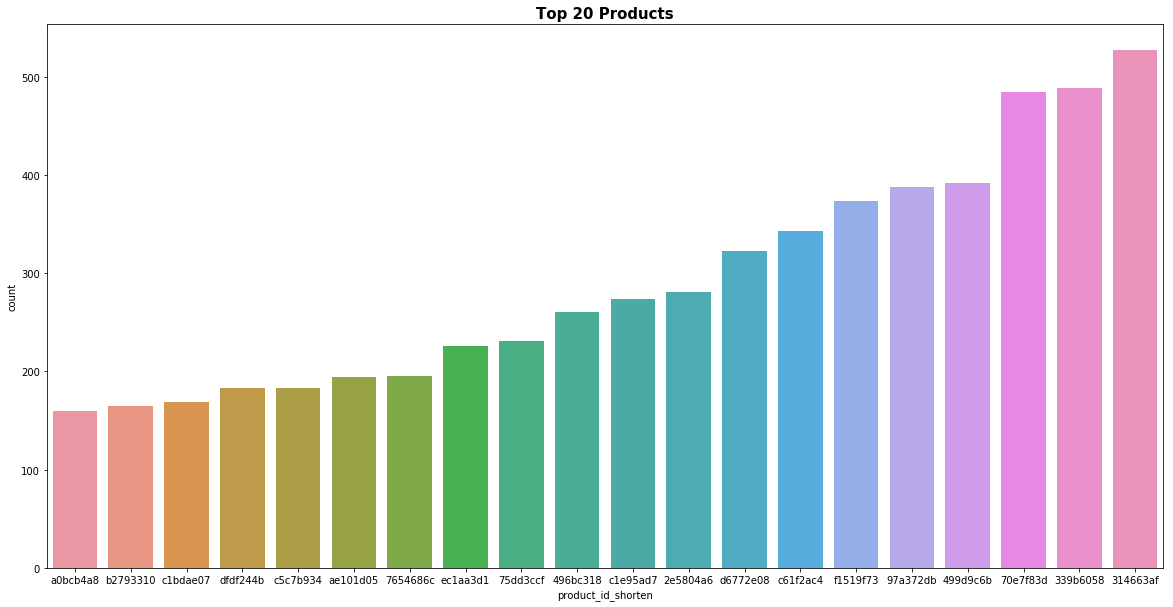

In [26]:
#Plotting Top 200 Products
plt.figure(figsize=(20,10))
sns.countplot(x='product_id_shorten', data=product_orders,
             order=product_orders['product_id_shorten'].value_counts()[:20]\
             .sort_values().index).set_title("Top 20 Products", fontsize=15,
                                             weight='bold')

The above graph shows the Top 20 products. Top 3 products have a significant difference from the others. Because of the data information, we can't say about what are these products. But we can assume about their category.

First Top 20 products' category shown below the table. According to the table, ``bed_table_bath`` orders have the highest one.

In [27]:
product_orders.groupby(["product_category_name"])["product_id_shorten"].count().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: product_id_shorten, dtype: int64

In [28]:
group_category= product_orders.groupby(['product_id_shorten','product_category_name',])['product_id_shorten']\
                                        .count().sort_values(ascending=False).head(10)
group_category

product_id_shorten  product_category_name 
314663af            moveis_decoracao          527
339b6058            cama_mesa_banho           488
70e7f83d            ferramentas_jardim        484
499d9c6b            ferramentas_jardim        392
97a372db            ferramentas_jardim        388
f1519f73            ferramentas_jardim        373
c61f2ac4            informatica_acessorios    343
d6772e08            relogios_presentes        323
2e5804a6            beleza_saude              281
c1e95ad7            informatica_acessorios    274
Name: product_id_shorten, dtype: int64

Despite the top product category of ``bed_table_bath``, the top ordered product's category is a ``home decoration``. 

## 3.3. Top 20 Seller

In [29]:
sellers_data = pd.read_sql_query(
    "select * from olist_sellers_dataset;",
    connection)

First ``seller`` dataset will be merged with the ``product orders`` data.

In [30]:
seller_products = pd.merge(product_orders, sellers_data, on="seller_id")
seller_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111046 entries, 0 to 111045
Data columns (total 31 columns):
order_id                         111046 non-null object
customer_id                      111046 non-null object
order_status                     111046 non-null object
order_purchase_timestamp         111046 non-null object
order_approved_at                111032 non-null object
order_delivered_carrier_date     109889 non-null object
order_delivered_customer_date    111046 non-null object
order_estimated_delivery_date    111046 non-null object
delivered_time                   111046 non-null object
estimate_time                    111046 non-null object
weekly                           111046 non-null int64
yearly                           111046 non-null object
diff_days                        111046 non-null int64
order_item_id                    111046 non-null int64
product_id                       111046 non-null object
seller_id                        111046 non-null obj

As the ``product id`` value name, the ``seller id`` name needed to be shortened. 

In [31]:
len(seller_products['seller_id'].unique())

3035

In [32]:
len(seller_products['seller_id'].str[-6:].unique())

3035

In [33]:
seller_products['seller_id_shorten']=seller_products['seller_id'].str[-6:]

Below pie chart shows the Top 20 Seller. First 3 sellers have close proportions.

Text(0.5,1,'Top 10 Seller')

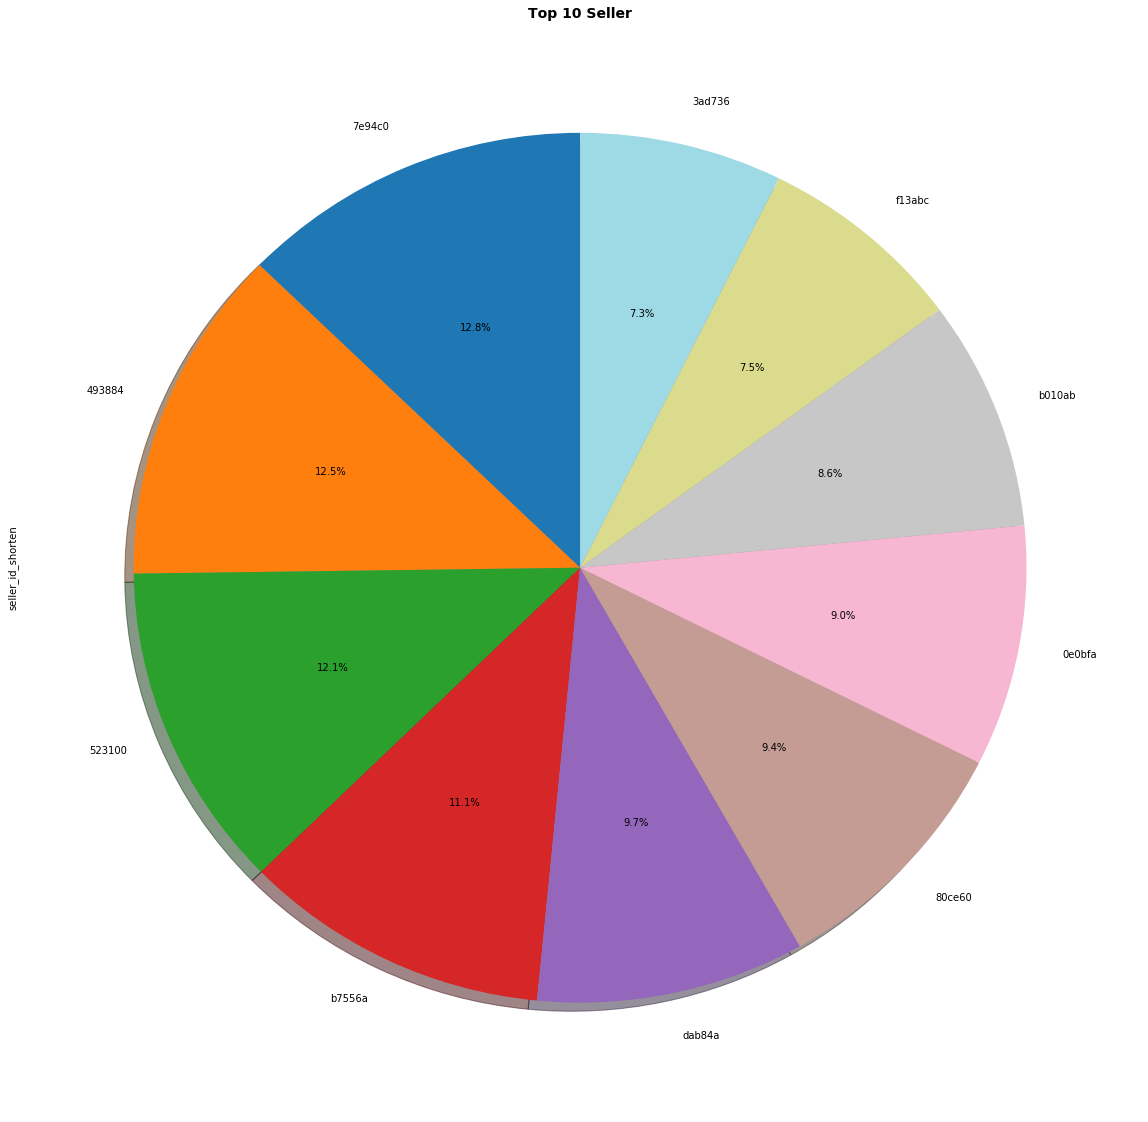

In [34]:
plt.figure(figsize=(20,20))
seller_products['seller_id_shorten'].value_counts()[:10].plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, cmap='tab20')
plt.title("Top 10 Seller",size=14, weight='bold')

Assuming for the orders' product category of these sellers, we can use 'product category' values. Below table shows the Top 10 sellers category, and since they can sell multiple product types, garden tools are the most selling product of the best seller. 

In [35]:
seller_category= seller_products.groupby(['seller_id_shorten', 'product_category_name'])\
                        ['seller_id_shorten'].count().sort_values(ascending=False).head(10)
seller_category

seller_id_shorten  product_category_name
523100             ferramentas_jardim       1882
7e94c0             relogios_presentes       1628
493884             cama_mesa_banho          1572
0e0bfa             moveis_decoracao         1292
dab84a             cama_mesa_banho          1277
b010ab             moveis_escritorio        1233
f13abc             telefonia                1178
b7556a             beleza_saude             1091
3ad736             cool_stuff               1069
3b52b2             relogios_presentes       1002
Name: seller_id_shorten, dtype: int64

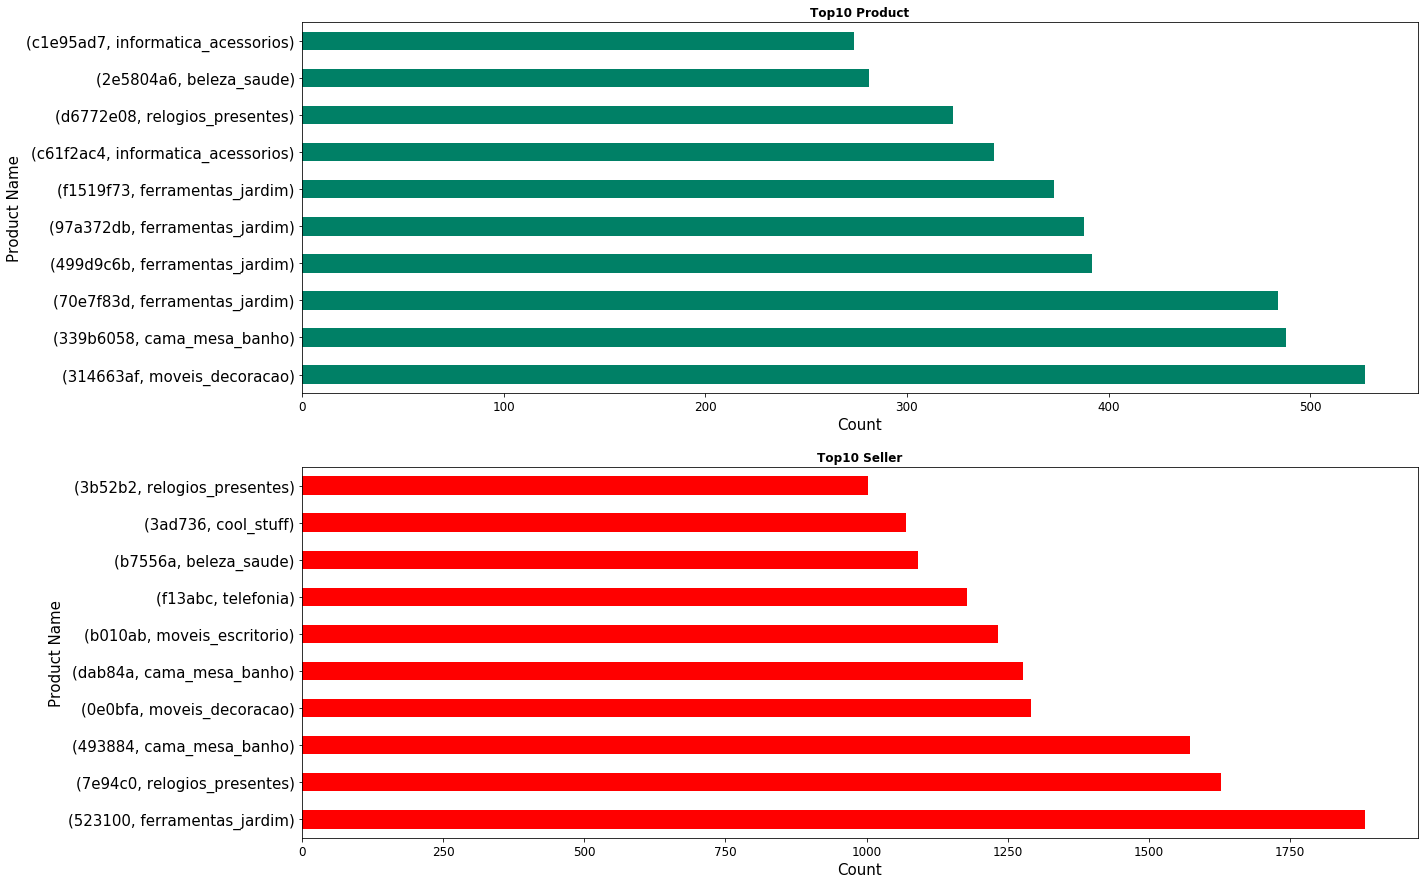

In [36]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))
group_category.plot.barh(ax=ax1, cmap='summer')
seller_category.plot.barh(ax=ax2, cmap='autumn')

ax1.set_title('Top10 Product', fontweight='bold')
ax2.set_title('Top10 Seller', fontweight='bold')

ax1.set_xlabel('Count', fontsize=15)
ax1.set_ylabel('Product Name', fontsize=15)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=15)

ax2.set_xlabel('Count', fontsize=15)
ax2.set_ylabel('Product Name', fontsize=15)
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=15)

Above graphs show the top products and top sellers category. While most selling product item belongs to the home decoration, most seller item belongs to garden tools.

Now, we can examine the most selling product's weekly purchased numbers, which is ``314663af`` and belong to ``home decoration``.

In [37]:
# First creating new feature of weeks
product_orders['order_week']= pd.to_datetime(product_orders['order_purchase_timestamp'],
                                            format='%Y-%m-%d').dt.week

Below graph shows the weekly purchased number of ``314663af``. According to that, the least purchased months are June and August. In the rest of the months, at least one week is the highest purchase of those months. 

Text(0.5,1,'Weekly Purchased Number of `314663af`')

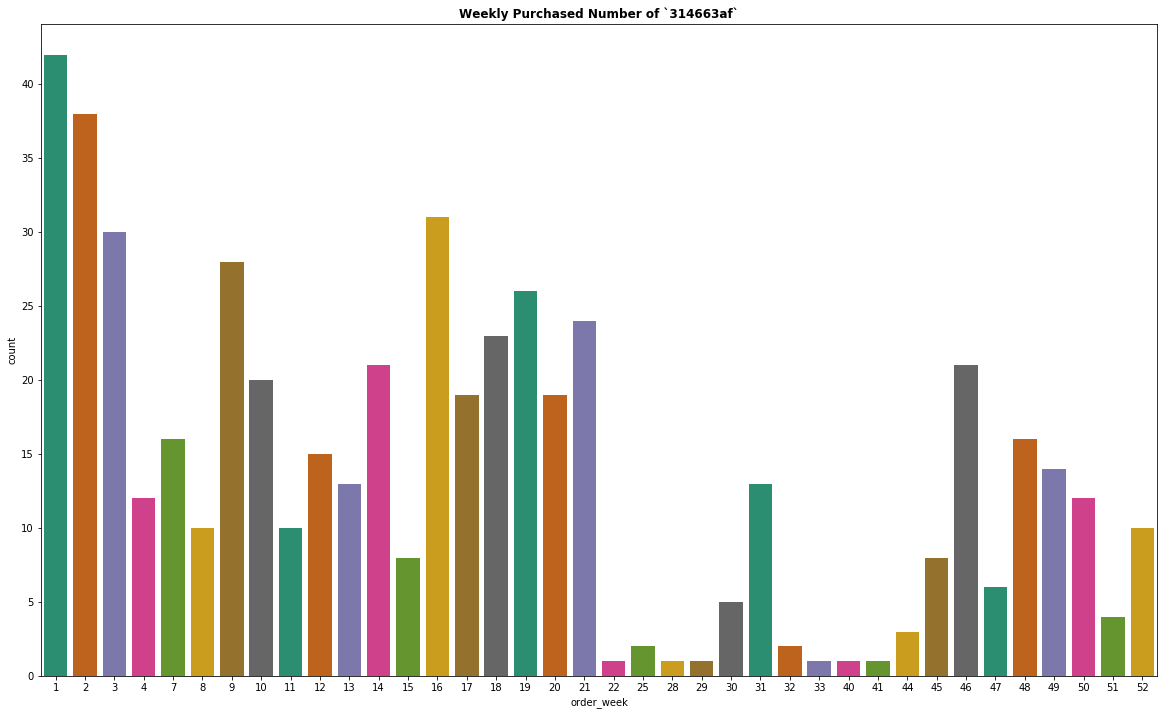

In [38]:
plt.figure(figsize=(20,12))
sns.countplot('order_week', data=product_orders[product_orders['product_id_shorten']== 
                                        '314663af'], palette='Dark2', linewidth=5)\
                                        .set_title('Weekly Purchased Number of `314663af`'
                                                   ,fontweight='bold')


Now instead of the most selling ordered product, we can examine the most selling product category by weekly. 

In [39]:
#Weekly popular items 
items_weekly =product_orders.groupby(['order_week','product_category_name'])\
                        ['product_category_name'].count().sort_values(ascending=False)
#Change to data frame
most_products= items_weekly.reset_index(name='count')

In [40]:
#Find the max value of row
max_selling_products= most_products[most_products['count'] 
                            == most_products.groupby(['order_week'])\
                            ['count'].transform(max)]
max_selling_products.head(10)

,order_week,product_category_name,count
0,47,cama_mesa_banho,438
2,33,cama_mesa_banho,355
3,29,cama_mesa_banho,339
4,8,informatica_acessorios,330
5,32,beleza_saude,330
8,31,beleza_saude,320
9,9,informatica_acessorios,314
10,19,beleza_saude,310
11,18,beleza_saude,302
12,23,cama_mesa_banho,301


In [41]:
max_selling_products['product_category_name'].value_counts()

cama_mesa_banho           33
beleza_saude              10
informatica_acessorios     3
esporte_lazer              3
moveis_decoracao           2
brinquedos                 1
Name: product_category_name, dtype: int64

Above table shows that 33 of 52 weeks the most selling's product is ``bed_table_bath``. This category is in the top 3 either most selling product group or most sellers group. 

## 3.3. Payments 
Last data exploratory is about payments. 

In [42]:
payment_data = pd.read_sql_query(
    "select * from olist_order_payments_dataset;",
    connection)

In [43]:
payments=pd.merge(seller_products, payment_data, on="order_id")
payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115902 entries, 0 to 115901
Data columns (total 36 columns):
order_id                         115902 non-null object
customer_id                      115902 non-null object
order_status                     115902 non-null object
order_purchase_timestamp         115902 non-null object
order_approved_at                115888 non-null object
order_delivered_carrier_date     114695 non-null object
order_delivered_customer_date    115902 non-null object
order_estimated_delivery_date    115902 non-null object
delivered_time                   115902 non-null object
estimate_time                    115902 non-null object
weekly                           115902 non-null int64
yearly                           115902 non-null object
diff_days                        115902 non-null int64
order_item_id                    115902 non-null int64
product_id                       115902 non-null object
seller_id                        115902 non-null obj

In [44]:
#First drop irrelevant columns that to make more handy to data
payments= payments.drop(columns=['product_name_lenght','product_description_lenght',
                                 'product_photos_qty','product_weight_g','product_length_cm',
                                 'product_height_cm','product_width_cm'])

In [45]:
price_details= payments.groupby(['order_id','price','product_category_name',
                                 'yearly','weekly'])[['freight_value','payment_value']].sum().reset_index()

As written on the data description, ``total order value`` can be calculated by sum of ``price`` and ``freight value``.

In [46]:
price_details['total_order_value'] = price_details['price'] + price_details['freight_value']

We can calculate ``Gross Profit`` and ``Profit Margin`` by ``payment value`` and ``total order value``

In [47]:
price_details['gross_profit'] = price_details['payment_value']- price_details['total_order_value']
price_details['profit_margin'] = price_details['gross_profit']/price_details['payment_value']
price_details['profit_margin'] = price_details['profit_margin'].astype('int64')

In [48]:
price_details.sort_values('gross_profit', ascending=False).head(10)

,order_id,price,product_category_name,yearly,weekly,freight_value,payment_value,total_order_value,gross_profit,profit_margin
1466,03caa2c082116e1d31e67e9ae3700499,1680.00,telefonia_fixa,2017-10,42,224.08,109312.64,1904.08,107408.56,0
66522,ab14fdcfbe524636d65ee38360e22ce8,98.70,automotivo,2017-09,35,288.80,45256.00,387.50,44868.50,0
10548,1b15974a0141d54e36626dca3fdc731a,100.00,informatica_acessorios,2018-03,10,202.40,44048.00,302.40,43745.60,0
17262,2cc9089445046817a7539d90805e6e5a,989.10,agro_industria_e_comercio,2017-12,50,146.94,36489.24,1136.04,35353.20,0
90940,e8fa22c3673b1dd17ea315021b1f0f61,284.99,bebidas,2018-05,18,168.70,30186.00,453.69,29732.31,0
44991,736e1922ae60d0d6a89247b851902527,1790.00,telefonia_fixa,2018-07,30,114.88,29099.52,1904.88,27194.64,0
25844,428a2f660dc84138d969ccd69a0ab6d5,65.49,moveis_decoracao,2017-12,50,243.30,18384.75,308.79,18075.96,0
22593,3a213fcdfe7d98be74ea0dc05a8b31ae,108.00,relogios_presentes,2018-01,4,186.24,17786.88,294.24,17492.64,0
96746,f80549a97eb203e1566e026ab66f045b,137.90,informatica_acessorios,2017-09,39,388.10,17671.00,526.00,17145.00,0
26447,4412d97cb2093633afa85f11db46316c,120.00,informatica_acessorios,2018-06,23,83.99,15978.65,203.99,15774.66,0


Text(0.5,1,'Gross Profit of Top 5 Products (2016-2018)')

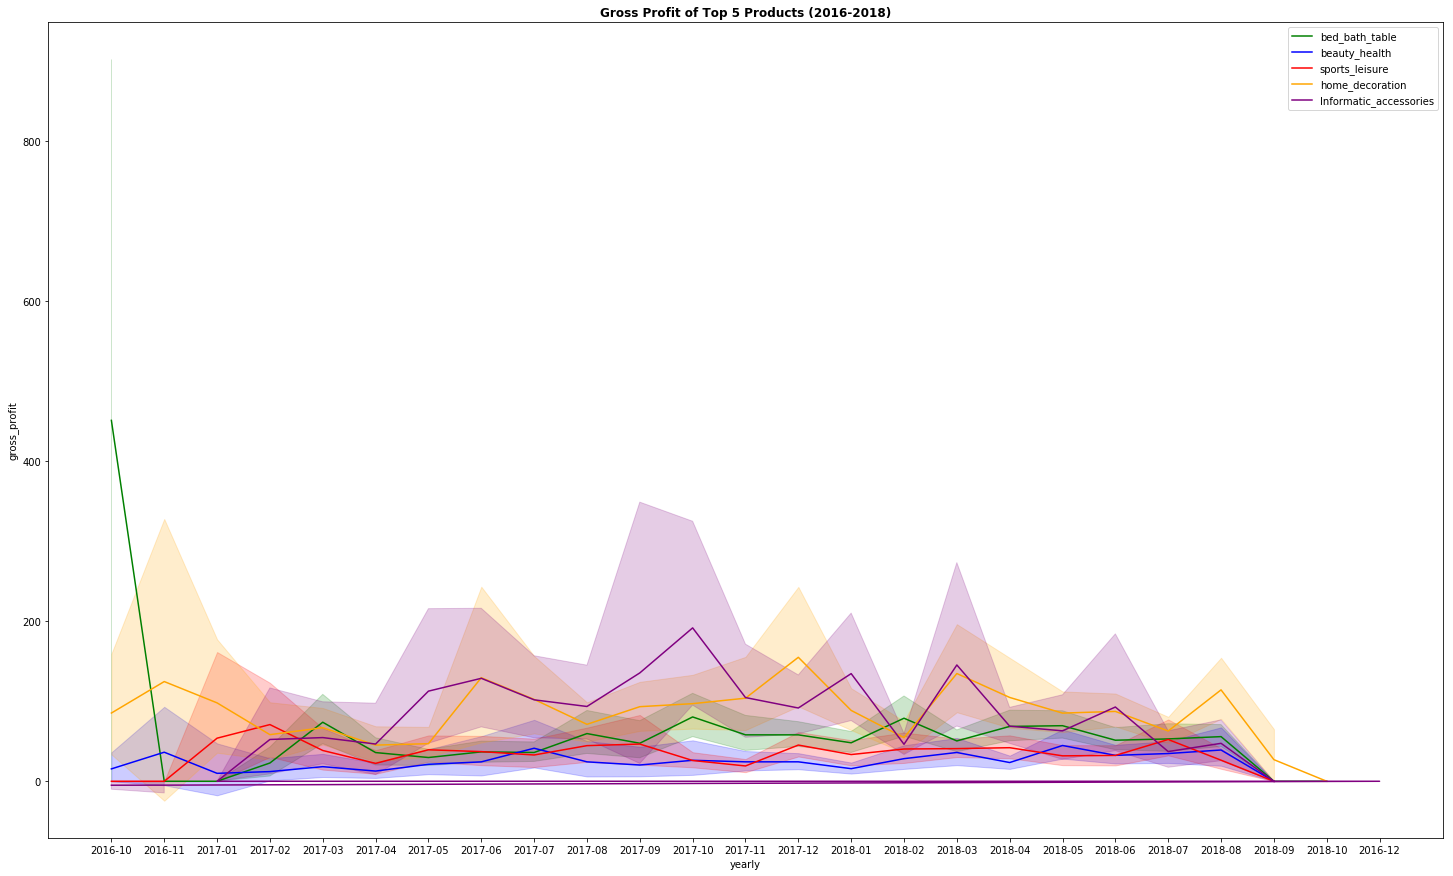

In [49]:
plt.figure(figsize=(25,15))

sns.lineplot(x='yearly',y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='cama_mesa_banho'], label='bed_bath_table',color="green")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='beleza_saude'], label='beauty_health', color="blue")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='esporte_lazer'], label='sports_leisure', color="red")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='moveis_decoracao'], label='home_decoration', color="orange")
sns.lineplot(x='yearly', y='gross_profit',
             data=price_details[price_details['product_category_name']\
             =='informatica_acessorios'], label='Informatic_accessories', color="purple")
plt.title("Gross Profit of Top 5 Products (2016-2018)",fontweight='bold')

Above graph shows yearly 'gross profit' distribution for the top 5 product category of ordered products and sellers. According to data, we can say that ``informatic_accessories`` have the highest gross profit in Agust 2017 to November 2017. On the other hand, the top 3 products which are ``bed_bath_table``, ``beauty_health`` and ``sports_leisure``, gross profits are less than 200 units of currency.

# 4 Preprocessing

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import collections

# 1. Get Orders data set

In [51]:
orders = pd.read_sql_query(
    "select * from olist_orders_dataset;",
    connection)
orders.tail(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99431,b0f4af5c1b06e24fef510703bfe9f0a6,8e1ec396e317ff4c82a03ce16a0c3eb3,delivered,2017-10-27 15:21:00,2017-10-27 15:32:49,2017-10-30 15:44:34,2017-11-10 17:57:22,2017-11-22 00:00:00
99432,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00
99433,9115830be804184b91f5c00f6f49f92d,da2124f134f5dfbce9d06f29bdb6c308,delivered,2017-10-04 19:57:37,2017-10-04 20:07:14,2017-10-05 16:52:52,2017-10-20 20:25:45,2017-11-07 00:00:00
99434,aa04ef5214580b06b10e2a378300db44,f01a6bfcc730456317e4081fe0c9940e,delivered,2017-01-27 00:30:03,2017-01-27 01:05:25,2017-01-30 11:40:16,2017-02-07 13:15:25,2017-03-17 00:00:00
99435,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23 09:05:12,2017-02-23 09:15:11,2017-03-01 10:22:52,2017-03-06 11:08:08,2017-03-22 00:00:00
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


In [52]:
#missing values is each column
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [53]:
#orders.duplicated().sum
orders = orders.dropna()

In [54]:
orders = orders.astype({"order_status" : 'category', \
                       "order_purchase_timestamp" : 'datetime64[ns]', "order_approved_at" : 'datetime64[ns]', \
                       "order_delivered_carrier_date" : 'datetime64[ns]', "order_delivered_customer_date" : 'datetime64[ns]', \
                       "order_estimated_delivery_date" : 'datetime64[ns]'})

In [55]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

# 2. Orders and payments

## 2.1 Payments data set

In [56]:
payments = pd.read_sql_query(
    "select * from olist_order_payments_dataset;",
    connection)

In [57]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [58]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [59]:
payments = payments.astype({"payment_type" : 'category'})

In [60]:
payments.order_id.is_unique

False

In [61]:
payments.drop_duplicates(subset='order_id', inplace=True)

## 2.2 Merge Orders and Payments

In [62]:
orders_and_payments = orders.merge(payments, on='order_id', how='inner')

In [63]:
orders_and_payments.shape

(96460, 12)

In [64]:
orders_and_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,credit_card,1,28.62


In [65]:
orders_and_payments.customer_id.is_unique

True

# 3. Orders, payments and Customers

## 3.1 Customers data set

In [66]:
customers = pd.read_sql_query(
    "select * from olist_customers_dataset;",
    connection)

In [67]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,09790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,01151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,08775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [68]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null object
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: object(5)
memory usage: 3.8+ MB


In [69]:
#key to the orders dataset. Each order has a unique customer_id.
#unique identifier of a customer.
customers.customer_id.is_unique, customers.customer_unique_id.is_unique

(True, False)

## 3.2 Orders, customers and payments

In [70]:
orders_customers_payments = orders_and_payments.merge(customers, on='customer_id', how='inner')

In [71]:
orders_customers_payments.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,credit_card,1,72.20,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,credit_card,1,28.62,72632f0f9dd73dfee390c9b22eb56dd6,09195,santo andre,SP


In [72]:
orders_customers_payments.order_id.is_unique

True

# 4. Orders, payments, customers and reviews

## 4.1 Reviews data set

In [73]:
reviews = pd.read_sql_query(
    "select * from olist_order_reviews_dataset;",
    connection)

In [74]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [75]:
reviews.order_id.is_unique, reviews.review_id.is_unique

(False, False)

In [76]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


We choose not to directly drop null rows for comment title, msg. Because it is very likely that a customer is not gonna write a comment. Furthermore, these rows represent almost half of the data set. We will just fill them with a "The customer did not comment", which in portuguese translates to "O cliente não comentou". 

In [77]:
reviews = reviews.astype({"review_creation_date" : 'datetime64[ns]', "review_answer_timestamp":'datetime64[ns]'})

In [78]:
reviews.review_comment_message.fillna('O cliente não comentou', inplace=True)

In [79]:
reviews.review_comment_title.fillna('O cliente não comentou', inplace=True)

In [80]:
# Discard duplicates

In [81]:
reviews.drop_duplicates(subset='order_id', inplace=True)

In [82]:
reviews.drop_duplicates(subset='review_id', inplace=True)

In [83]:
reviews.shape, reviews.order_id.is_unique, reviews.review_id.is_unique

((98915, 7), True, True)

## 4.2 Orders, payments, customers and reviews

In [84]:
ordersPaymentsCustomersReview = orders_customers_payments.merge(reviews, on='order_id', how='inner')

In [85]:
ordersPaymentsCustomersReview.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,...,7c396fd4830fd04220f754e42b4e5bff,03149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,O cliente não comentou,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,...,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,...,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,O cliente não comentou,O cliente não comentou,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,credit_card,...,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5,O cliente não comentou,O produto foi exatamente o que eu esperava e e...,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,credit_card,...,72632f0f9dd73dfee390c9b22eb56dd6,09195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5,O cliente não comentou,O cliente não comentou,2018-02-17,2018-02-18 13:02:51


In [86]:
ordersPaymentsCustomersReview.shape

(95978, 22)

# 5. ordersPaymentsCustomersReview and Items

## 5.1 Products

In [87]:
products = pd.read_sql_query(
    "select * from olist_products_dataset;",
    connection)

In [88]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


In [89]:
products.product_id.is_unique

True

## 5.2 Items data set

In [90]:
items = pd.read_sql_query(
    "select * from olist_order_items_dataset;",
    connection)

In [91]:
items.head(20)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [92]:
items.order_id.is_unique, items.product_id.is_unique

(False, False)

In [93]:
items[items['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [94]:
items = items.groupby(['order_id']).agg({'order_item_id': 'last',
                       'seller_id': 'first', 'product_id' : 'first' ,
                        'shipping_limit_date' : 'first',
                        'price': sum,'freight_value': sum}).reset_index()

In [95]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 7 columns):
order_id               98666 non-null object
order_item_id          98666 non-null int64
seller_id              98666 non-null object
product_id             98666 non-null object
shipping_limit_date    98666 non-null object
price                  98666 non-null float64
freight_value          98666 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.3+ MB


In [96]:
items_and_products = items.merge(products, on='product_id', how='inner')

In [97]:
items_and_products.shape

(97249, 15)

In [98]:
items_and_products = items_and_products.astype({"shipping_limit_date" : 'datetime64[ns]', "product_category_name" : 'category'})

In [99]:
items_and_products.order_id.is_unique

True

In [100]:
items_and_products.head()

,order_id,order_item_id,seller_id,product_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58,598,4,650,28,9,14
1,130898c0987d1801452a8ed92a670612,1,48436dade18ac8b2bce089ec2a041202,4244733e06e7ecb4970a6e2683c13e61,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58,598,4,650,28,9,14
2,532ed5e14e24ae1f0d735b91524b98b9,1,48436dade18ac8b2bce089ec2a041202,4244733e06e7ecb4970a6e2683c13e61,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58,598,4,650,28,9,14
3,6f8c31653edb8c83e1a739408b5ff750,1,48436dade18ac8b2bce089ec2a041202,4244733e06e7ecb4970a6e2683c13e61,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58,598,4,650,28,9,14
4,7d19f4ef4d04461989632411b7e588b9,1,48436dade18ac8b2bce089ec2a041202,4244733e06e7ecb4970a6e2683c13e61,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58,598,4,650,28,9,14


## 5.3 Merge DataFrame

In [101]:
df = ordersPaymentsCustomersReview.merge(items_and_products, on='order_id')

In [102]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,...,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,...,118.70,22.76,perfumaria,29,178,1,400,19,13,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,...,159.90,19.22,automotivo,46,232,1,420,24,19,21
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,credit_card,...,45.00,27.20,pet_shop,59,468,3,450,30,10,20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,credit_card,...,19.90,8.72,papelaria,38,316,4,250,51,15,15


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94625 entries, 0 to 94624
Data columns (total 36 columns):
order_id                         94625 non-null object
customer_id                      94625 non-null object
order_status                     94625 non-null category
order_purchase_timestamp         94625 non-null datetime64[ns]
order_approved_at                94625 non-null datetime64[ns]
order_delivered_carrier_date     94625 non-null datetime64[ns]
order_delivered_customer_date    94625 non-null datetime64[ns]
order_estimated_delivery_date    94625 non-null datetime64[ns]
payment_sequential               94625 non-null int64
payment_type                     94625 non-null category
payment_installments             94625 non-null int64
payment_value                    94625 non-null float64
customer_unique_id               94625 non-null object
customer_zip_code_prefix         94625 non-null object
customer_city                    94625 non-null object
customer_state         

In [104]:
df.order_id.is_unique

True

In [105]:
df.to_csv('processed_data/orders.csv', header=True, index=False)

Save new order dataset in data folder seperately which will be used for customer satisfaction prediction

In [106]:
temp = pd.read_csv('processed_data/orders.csv')

In [107]:
temp

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,29.99,8.72,utilidades_domesticas,40,268,4,500,19,8,13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,118.70,22.76,perfumaria,29,178,1,400,19,13,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,159.90,19.22,automotivo,46,232,1,420,24,19,21
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,credit_card,...,45.00,27.20,pet_shop,59,468,3,450,30,10,20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,credit_card,...,19.90,8.72,papelaria,38,316,4,250,51,15,15
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,1,credit_card,...,147.90,27.36,automotivo,49,608,1,7150,65,10,65
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1,credit_card,...,59.99,15.17,automotivo,59,956,1,50,16,16,17
7,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00,1,boleto,...,19.90,16.05,moveis_decoracao,41,432,2,300,35,35,15
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00,2,voucher,...,149.99,19.77,moveis_escritorio,45,527,1,9750,42,41,42
9,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,1,credit_card,...,198.00,61.06,ferramentas_jardim,36,450,1,9000,42,12,39


## 5. CONCLUCION

In this notebook we saw data analysis that we can do to get best insights from this dataset and also preprocess the order dataset in order to use it with our customer satisfaction prediction problem.

